In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import loompy
import anndata

adata=sc.read_h5ad('/home/yike/phd/dengue/data/mergedata_20200930_high_quality.h5ad')
adata.obs['dataset'] = adata.obs['platform'].replace({
            '10X': 'child',
            'plate': 'adult'   
        })
adata.obs['sick'] = adata.obs['Condition'].replace({
    'S_dengue': 'sick',
    'dengue': 'sick',
    'DWS': 'sick'
})
sc.pp.normalize_total(adata, target_sum=1e6) #normalize data to CPM (counts per million)
sc.pp.log1p(adata)
#'Age'：共16个病人，11个儿童，5个成年人
#'Condition'：S_dengue,dengue,Healthy,DWS
#'cell_subtype'：unknown, naive_B, CD14+CD16-mono, CD4-CD8+t, memory_B, CD16+CD14+mono, CD4+CD8-t, CD14-CD16+mono, CD4+CD8+t
#'cell_type'：NK_cells, B_cells, T_cells, Monocytes, Plasmablasts, pDCs, cDCs

In [56]:
adata_children = adata[adata.obs['dataset'] == 'child']
adata_adults = adata[adata.obs['dataset'] == 'adult']
datasets = list(adata.obs['dataset'].astype('category').cat.categories)
sicks = list(adata.obs['sick'].astype('category').cat.categories)
cell_types = list(adata.obs['cell_type'].astype('category').cat.categories)
from collections import defaultdict
adata_dic = {}
for dataset in datasets:
    adata_ds = adata[adata.obs['dataset'] == dataset]
    for sick in sicks:
        adata_dic[(dataset, sick)] = adata_ds[adata_ds.obs['sick'] == sick]

adata_ct = {}
for dataset in datasets:
    adata_ds = adata[adata.obs['dataset'] == dataset]
    for cell_type in cell_types:
                adata_dic[(dataset, cell_type)] = adata_ds[adata_ds.obs['cell_type'] == cell_type] 

<ipython-input-47-f20dde3ae93f>:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


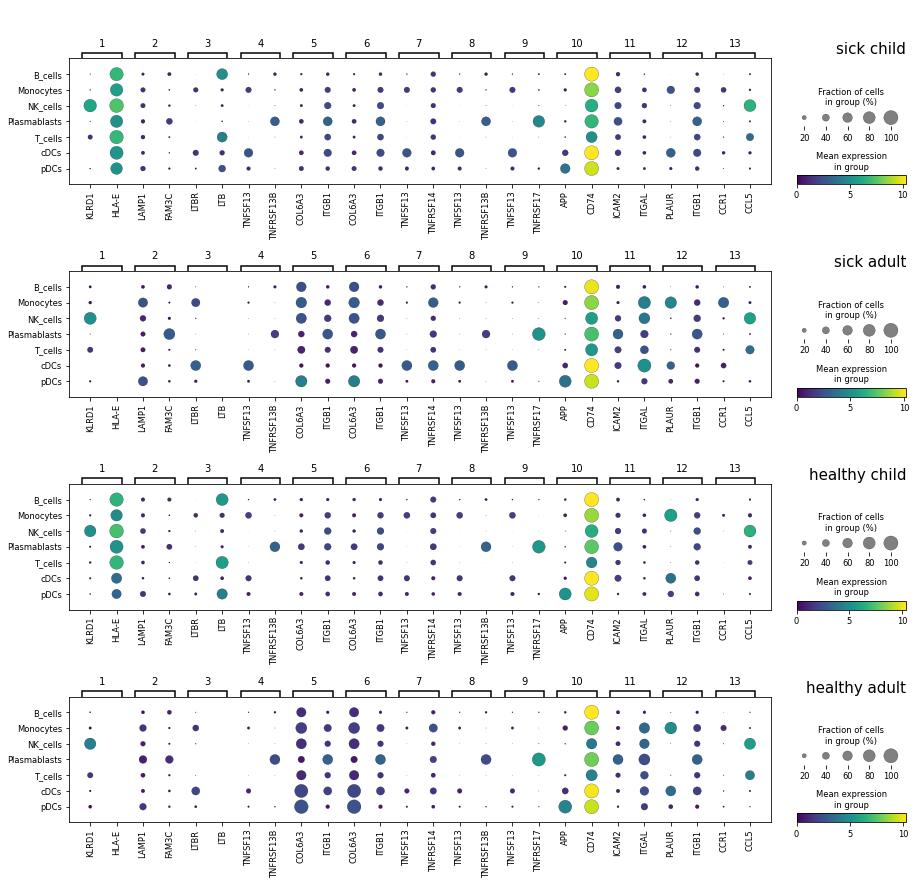

In [47]:
# cmap: bwr, viridis_r, Blues, RdBu_r, viridis
# genes from interactions special for sick child
genes_sick_child = {'1': ['KLRD1', 'HLA-E'],
                    '2': ['LAMP1', 'FAM3C'],
                    '3': ['LTBR', 'LTB'],
                    '4': ['TNFSF13', 'TNFRSF13B'],
                    '5': ['COL6A3', 'ITGB1'],
                    '6': ['COL6A3', 'ITGB1'],
                    '7': ['TNFSF13', 'TNFRSF14'],
                    '8': ['TNFSF13', 'TNFRSF13B'],
                    '9': ['TNFSF13', 'TNFRSF17'],
                    '10': ['APP', 'CD74'],
                    '11': ['ICAM2', 'ITGAL'],
                    '12': ['PLAUR', 'ITGB1'],
                    '13': ['CCR1', 'CCL5'],
                   }

fig,axs = plt.subplots(4, 1, figsize=(15,15), gridspec_kw={'wspace':0.3}, sharex=True)
ax=axs[0]
sc.pl.dotplot(adata_dic[('child', 'sick')], genes_sick_child, groupby='cell_type', ax=ax, show=False, cmap='viridis')
ax.set_title('sick child', fontsize=15, y=0.7, loc='right')
ax=axs[1]
sc.pl.dotplot(adata_dic[('adult', 'sick')], genes_sick_child, groupby='cell_type', ax=ax, show=False, cmap='viridis')
ax.set_title('sick adult', fontsize=15, y=0.7, loc='right')
ax=axs[2]
sc.pl.dotplot(adata_dic[('child', 'Healthy')], genes_sick_child, groupby='cell_type', ax=ax, show=False, cmap='viridis')
ax.set_title('healthy child', fontsize=15, y=0.7, loc='right')
ax=axs[3]
sc.pl.dotplot(adata_dic[('adult', 'Healthy')], genes_sick_child, groupby='cell_type', ax=ax, show=False, cmap='viridis')
ax.set_title('healthy adult', fontsize=15, y=0.7, loc='right')
plt.tight_layout()

<ipython-input-53-9c0c36690266>:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


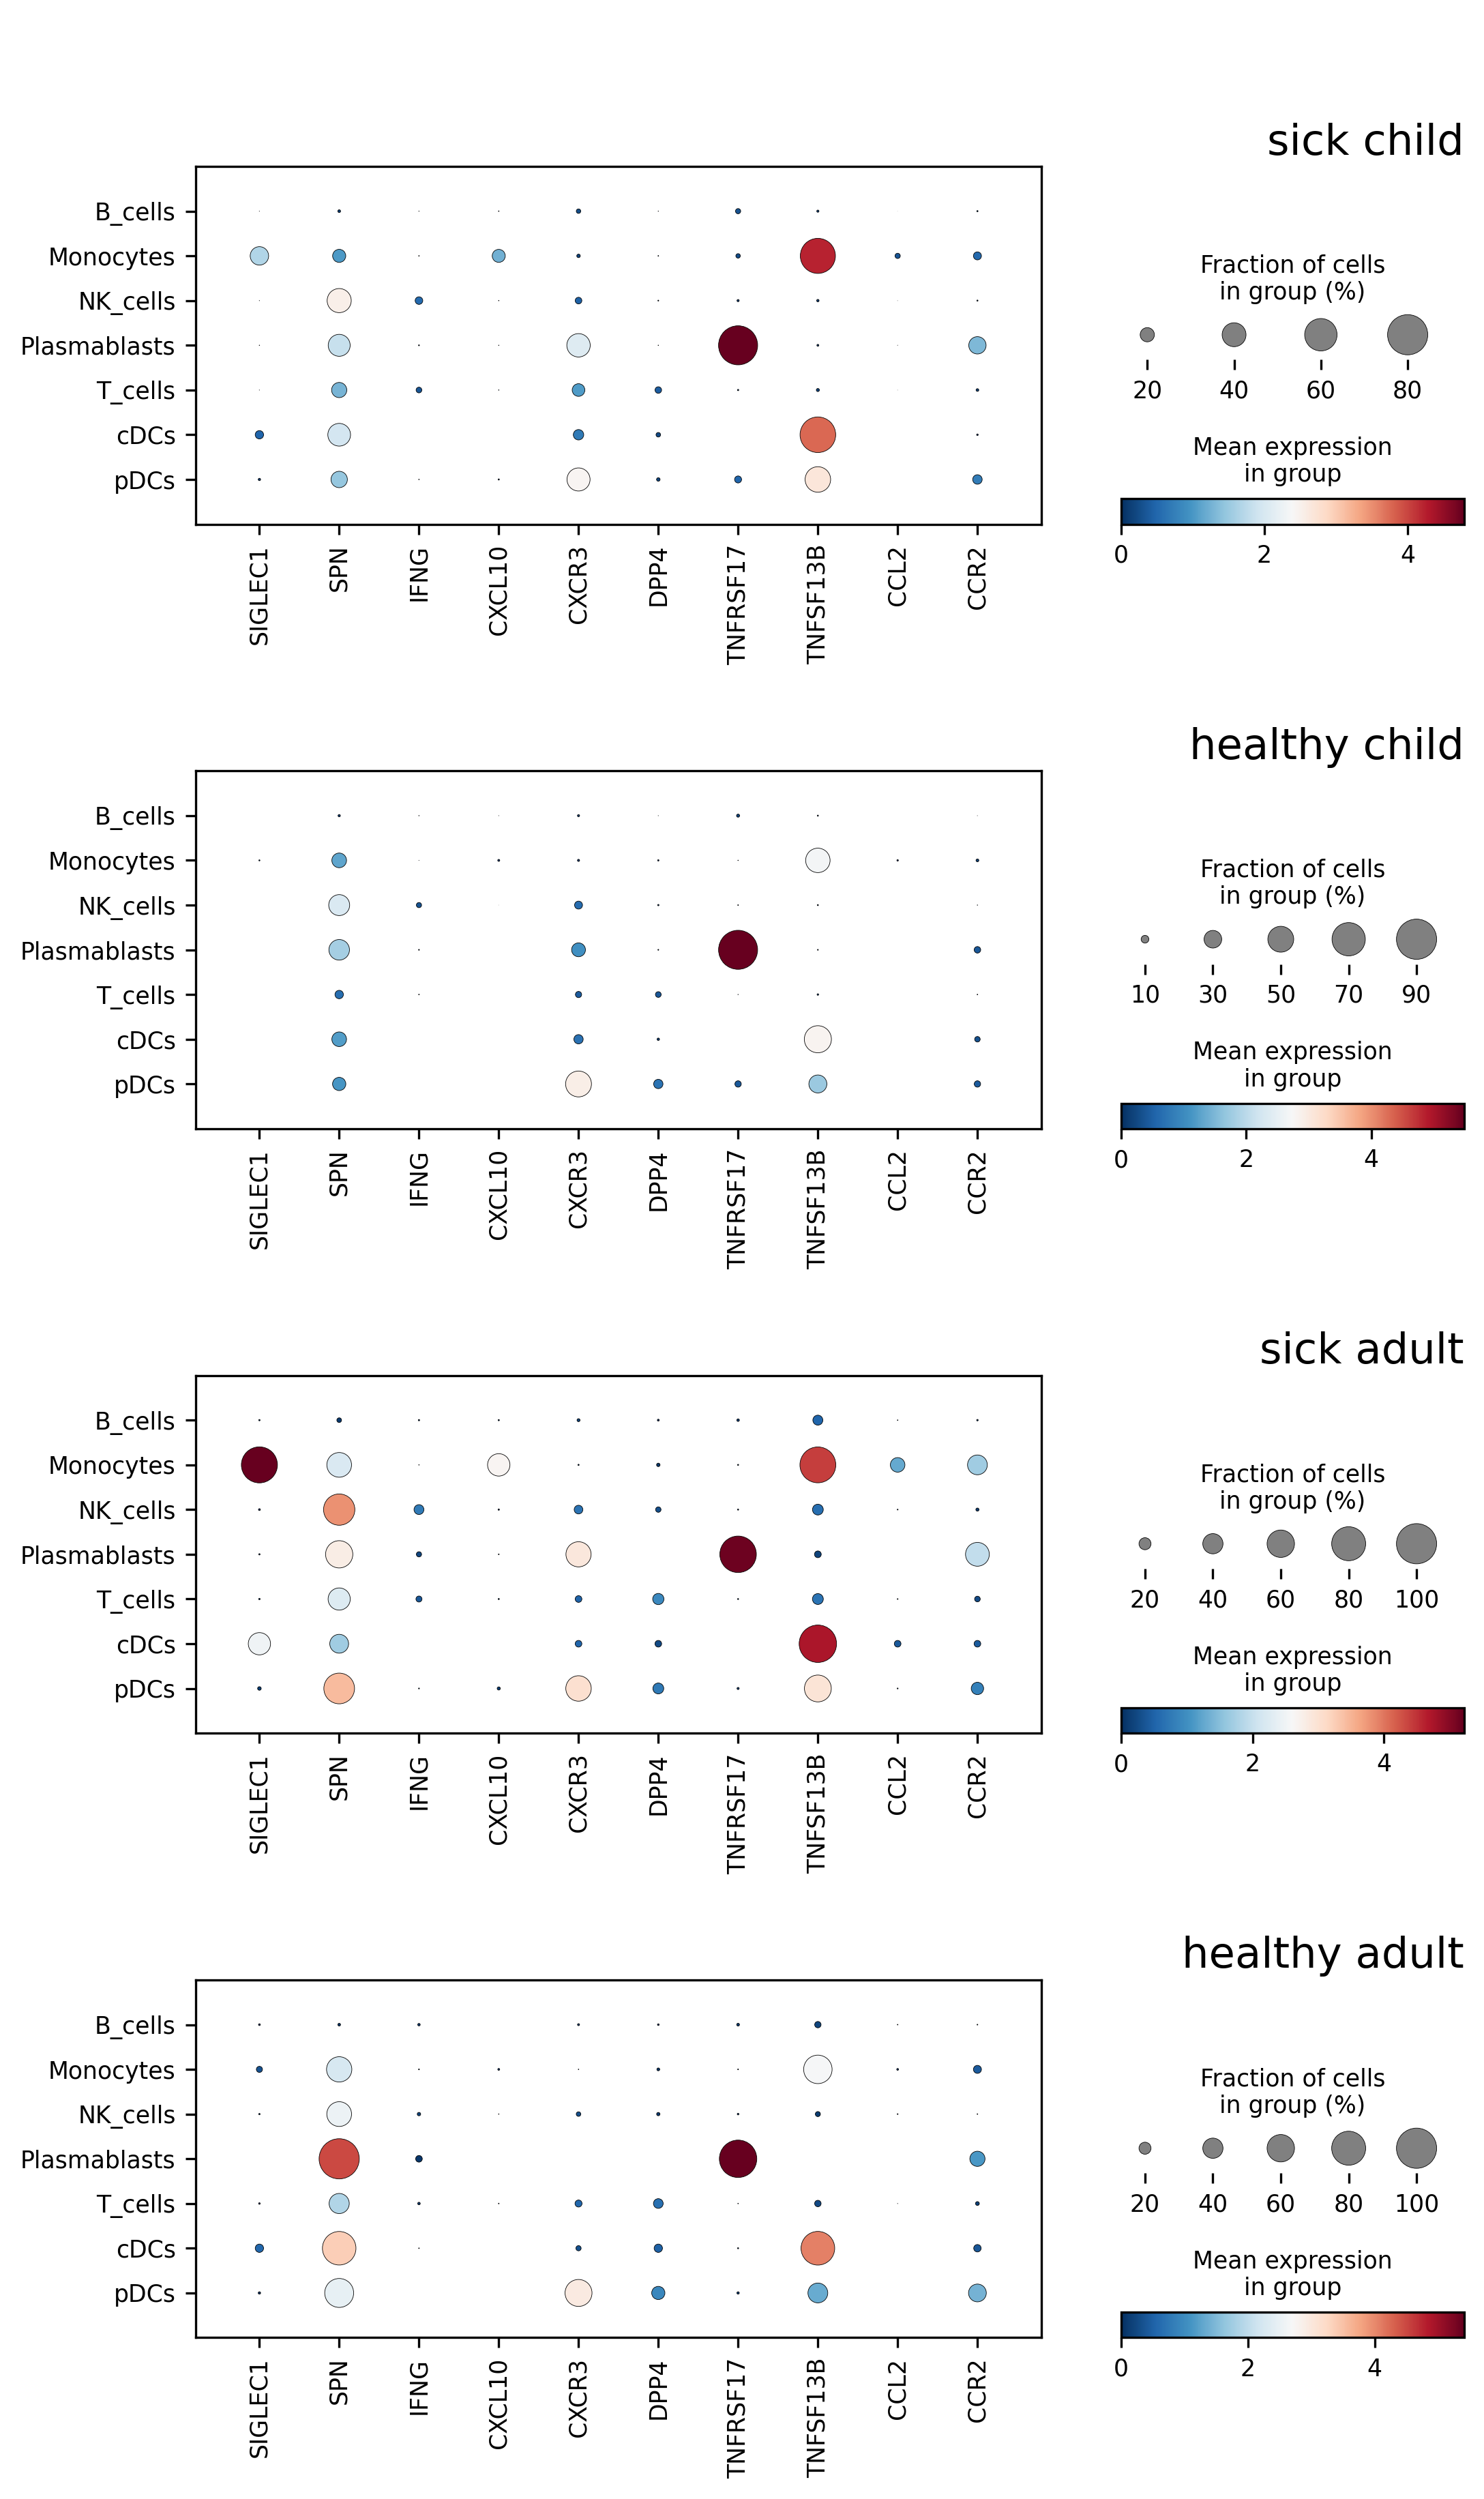

In [53]:
# cmap: bwr, viridis_r, Blues, RdBu_r, viridis
# genes from interactions special for sick child
# inters = ['SIGLEC1', 'SPN', 'IFNG', 'CXCL10', 'CXCR3', 'DPP4', 'TNFRSF17', 'TNFSF13B', 'CCL2', 'CCR2']

inters = ['SIGLEC1', 'SPN', 'IFNG', 'CXCL10', 'CXCR3', 'DPP4', 'TNFRSF17', 'TNFSF13B', 'CCL2', 'CCR2']

fig,axs = plt.subplots(4, 1, figsize=(8,15), gridspec_kw={'wspace':0.3}, sharex=True, dpi=300, facecolor='white')
ax=axs[0]
sc.pl.dotplot(adata_dic[('child', 'sick')], inters, groupby='cell_type', ax=ax, show=False, cmap='RdBu_r')
ax.set_title('sick child', fontsize=15, y=0.7, loc='right')
ax=axs[1]
sc.pl.dotplot(adata_dic[('child', 'Healthy')], inters, groupby='cell_type', ax=ax, show=False, cmap='RdBu_r')
ax.set_title('healthy child', fontsize=15, y=0.7, loc='right')
ax=axs[2]
sc.pl.dotplot(adata_dic[('adult', 'sick')], inters, groupby='cell_type', ax=ax, show=False, cmap='RdBu_r')
ax.set_title('sick adult', fontsize=15, y=0.7, loc='right')
ax=axs[3]
sc.pl.dotplot(adata_dic[('adult', 'Healthy')], inters, groupby='cell_type', ax=ax, show=False, cmap='RdBu_r')
ax.set_title('healthy adult', fontsize=15, y=0.7, loc='right')
plt.tight_layout()

<ipython-input-54-22c9fea6c40d>:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


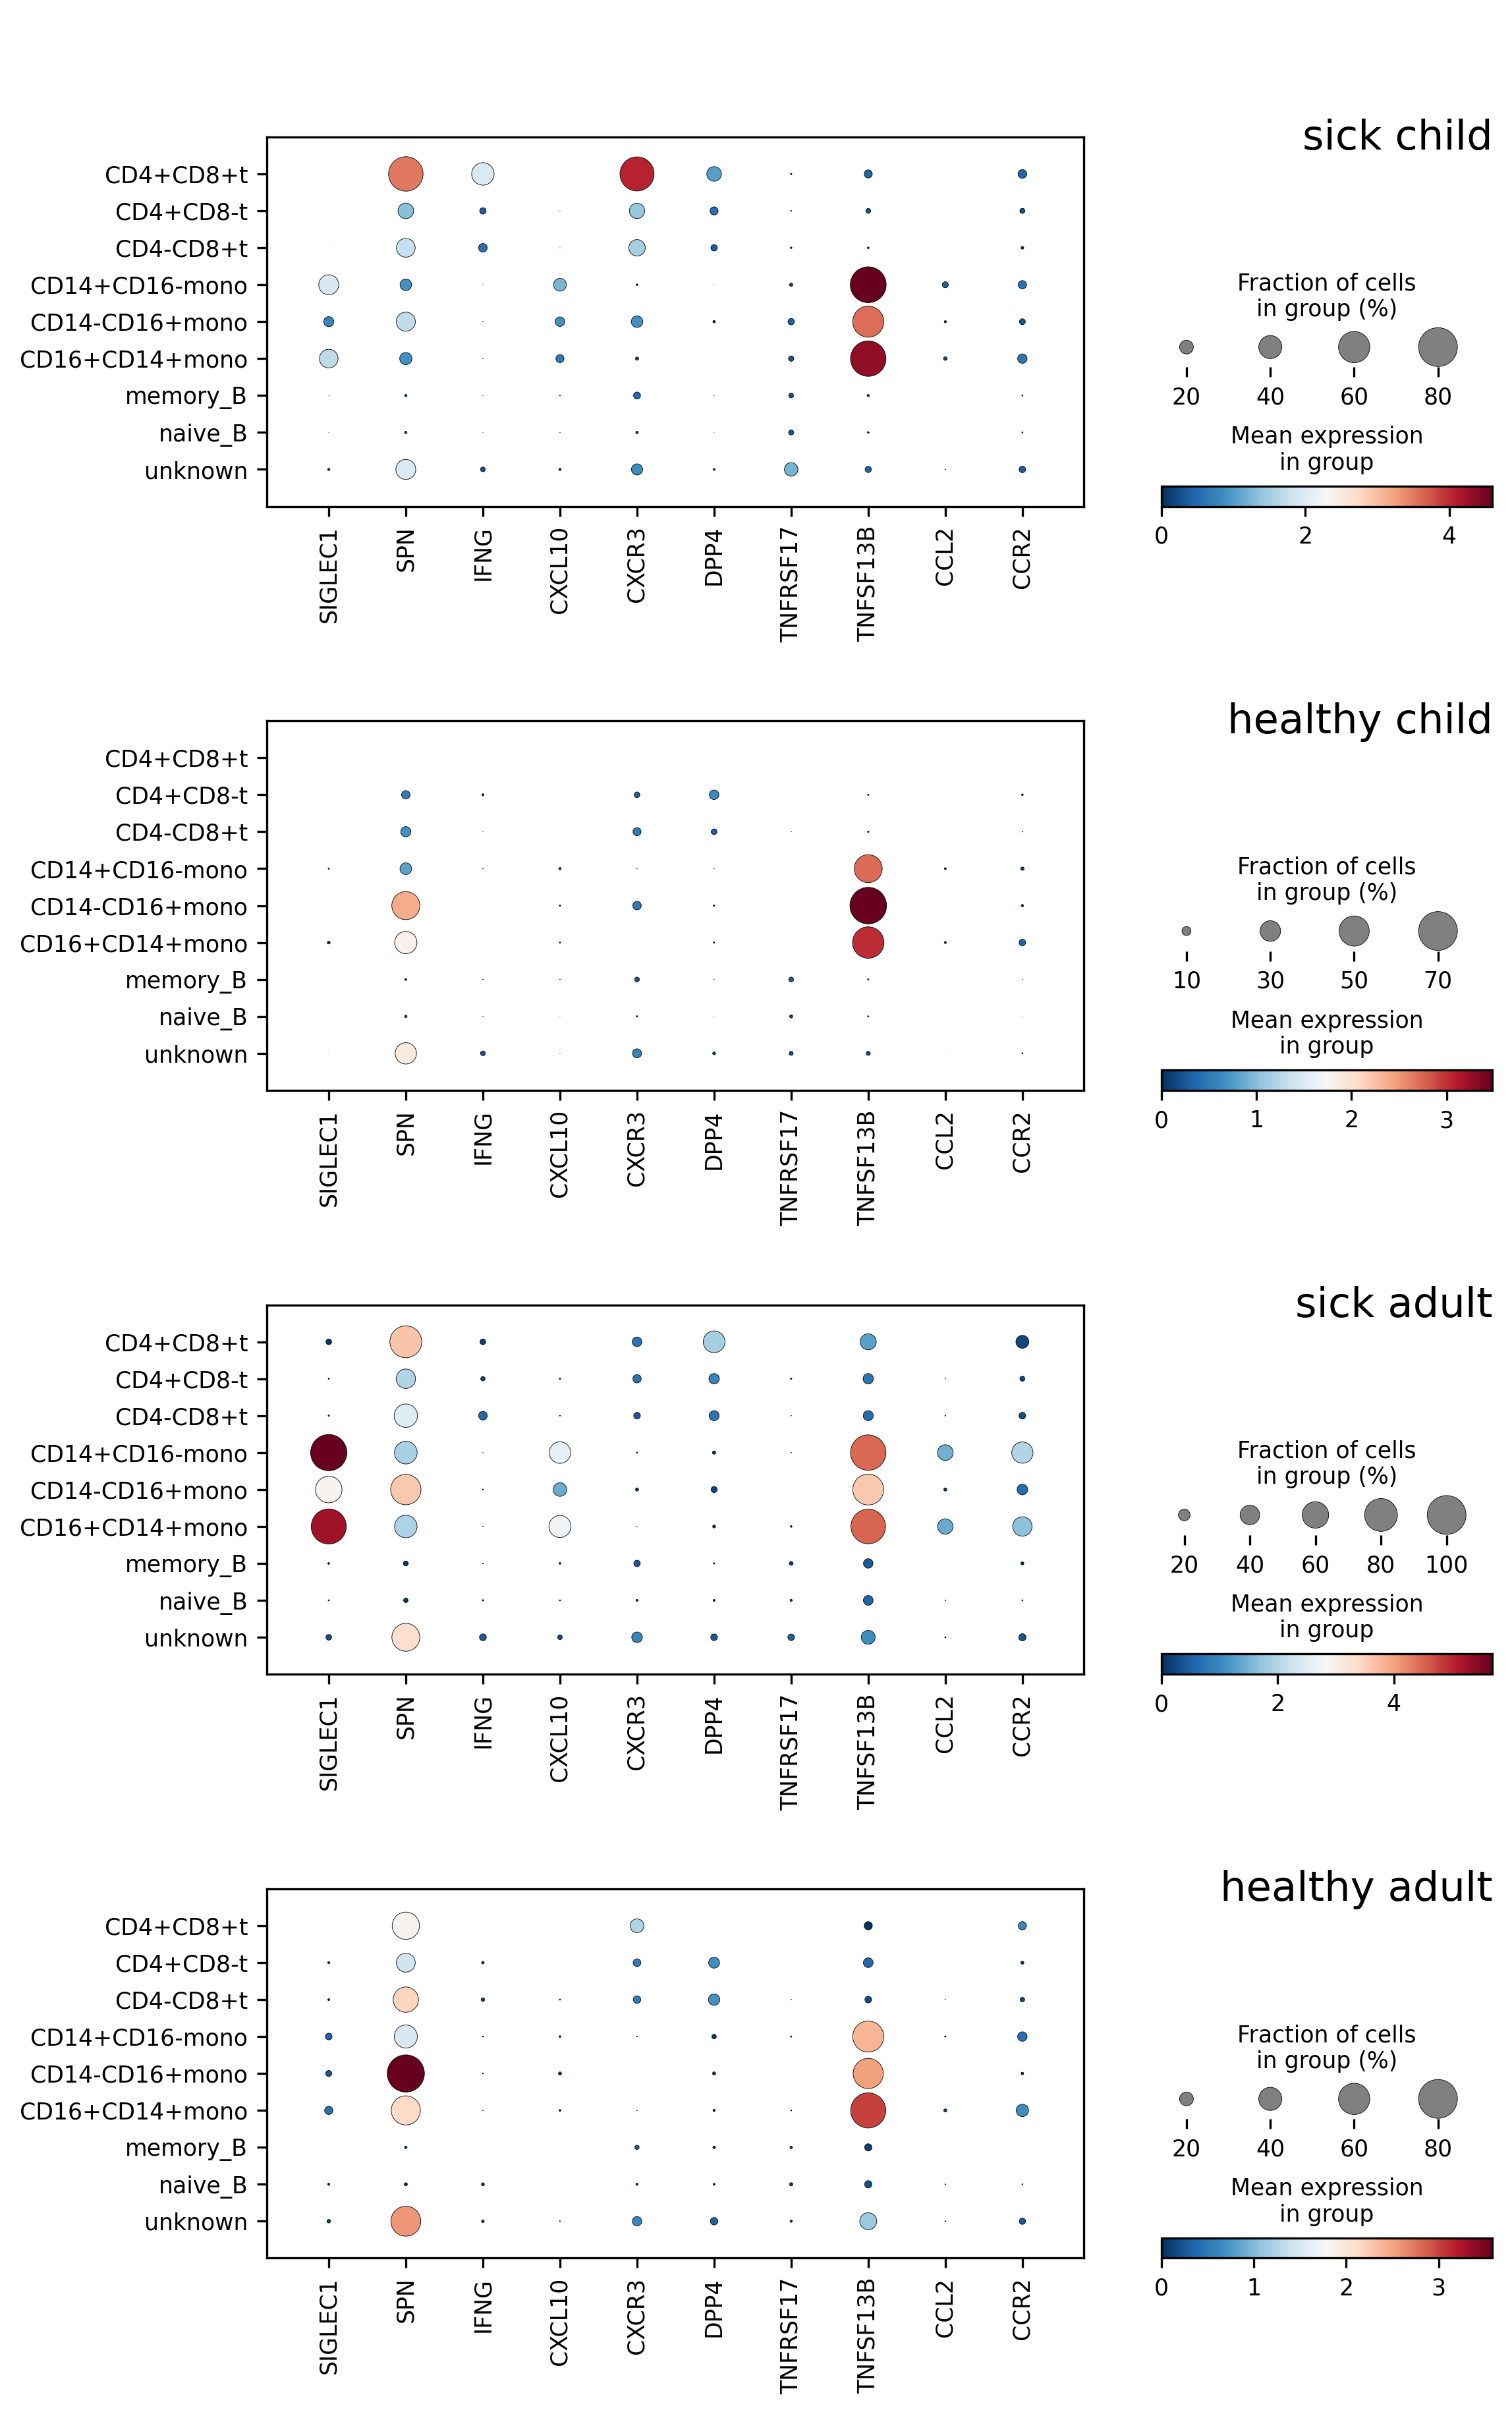

In [54]:
# cmap: bwr, viridis_r, Blues, RdBu_r, viridis
# genes from interactions special for sick child
# inters = ['SIGLEC1', 'SPN', 'IFNG', 'CXCL10', 'CXCR3', 'DPP4', 'TNFRSF17', 'TNFSF13B', 'CCL2', 'CCR2']

inters = ['SIGLEC1', 'SPN', 'IFNG', 'CXCL10', 'CXCR3', 'DPP4', 'TNFRSF17', 'TNFSF13B', 'CCL2', 'CCR2']

fig,axs = plt.subplots(4, 1, figsize=(8,15), gridspec_kw={'wspace':0.3}, sharex=True, dpi=300, facecolor='white')
ax=axs[0]
sc.pl.dotplot(adata_dic[('child', 'sick')], inters, groupby='cell_subtype', ax=ax, show=False, cmap='RdBu_r')
ax.set_title('sick child', fontsize=15, y=0.7, loc='right')
ax=axs[1]
sc.pl.dotplot(adata_dic[('child', 'Healthy')], inters, groupby='cell_subtype', ax=ax, show=False, cmap='RdBu_r')
ax.set_title('healthy child', fontsize=15, y=0.7, loc='right')
ax=axs[2]
sc.pl.dotplot(adata_dic[('adult', 'sick')], inters, groupby='cell_subtype', ax=ax, show=False, cmap='RdBu_r')
ax.set_title('sick adult', fontsize=15, y=0.7, loc='right')
ax=axs[3]
sc.pl.dotplot(adata_dic[('adult', 'Healthy')], inters, groupby='cell_subtype', ax=ax, show=False, cmap='RdBu_r')
ax.set_title('healthy adult', fontsize=15, y=0.7, loc='right')
plt.tight_layout()

<ipython-input-58-d5b7ebab2998>:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


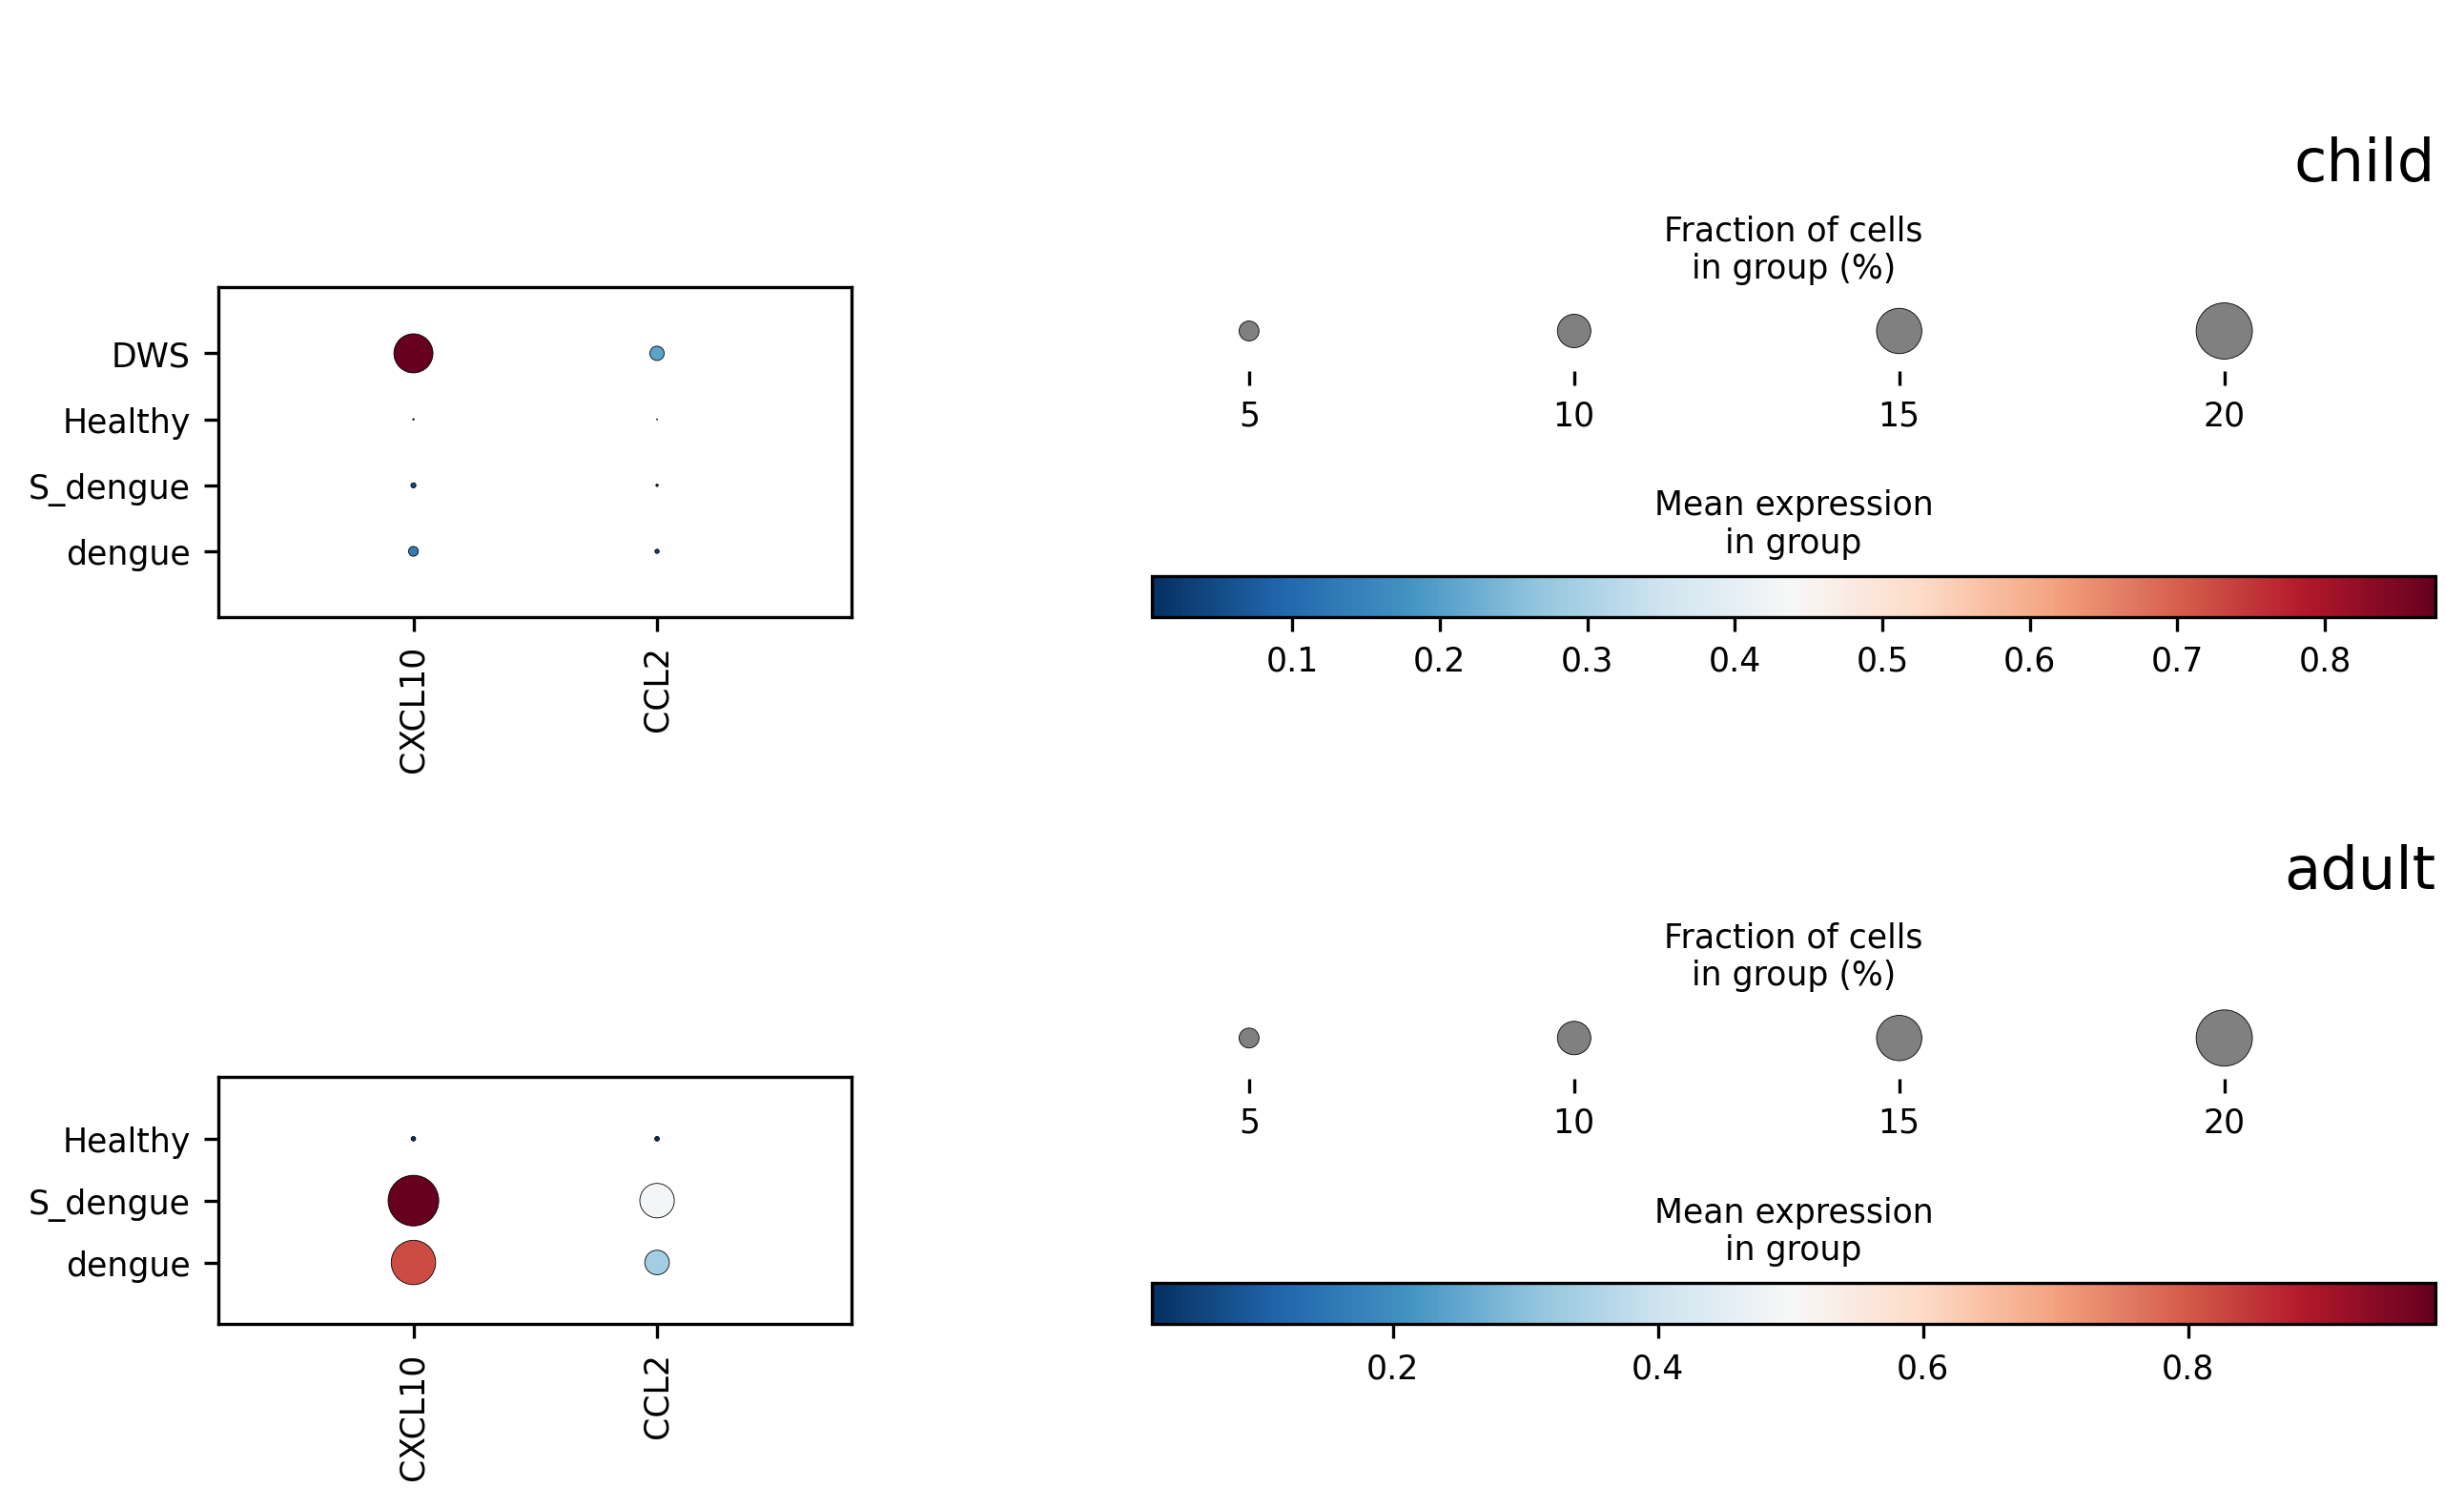

In [58]:
inters = ['CXCL10', 'CCL2']

adata
fig,axs = plt.subplots(2, 1, figsize=(10,6), gridspec_kw={'wspace':0.1}, sharex=True, dpi=300, facecolor='white')
ax=axs[0]
sc.pl.dotplot(adata_children, inters, groupby='Condition', ax=ax, show=False, cmap='RdBu_r')
ax.set_title('child', fontsize=15, y=0.7, loc='right')
ax=axs[1]
sc.pl.dotplot(adata_adults, inters, groupby='Condition', ax=ax, show=False, cmap='RdBu_r')
ax.set_title('adult', fontsize=15, y=0.7, loc='right')
plt.tight_layout()